In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sympy as sp

# OBTENDO DADOS
**TREINAMENTO NÃO SUPERVISIONADO** $\Rightarrow$ agrupar tipos de seres vivos a partir de suas características na tabela

- determinar espécie, que é desconhecida, a partir das variaveis que vão apresentar um padrão

In [20]:
df = pd.read_csv('DataBase.csv')
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# MODELO

In [21]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [22]:
xData = df.copy()
xData.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
def kmeansClustering(xData, nClusters=3):
    global classNames
    model = KMeans(n_clusters=nClusters, random_state=42)
    model.fit_predict(xData)
    return model


model = kmeansClustering(xData)
model

KMeans(n_clusters=3, random_state=42)

In [24]:
def kmeansPredict(model, xData):
    newClusters = model.predict(xData)
    newPredictions = pd.Series(newClusters).values
    return newPredictions

df['prediction'] = kmeansPredict(model, xData)
df

,sepal_length,sepal_width,petal_length,petal_width,prediction
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [25]:
classNames = df.prediction.unique()
print('classes: ', classNames)

classes:  [1 0 2]


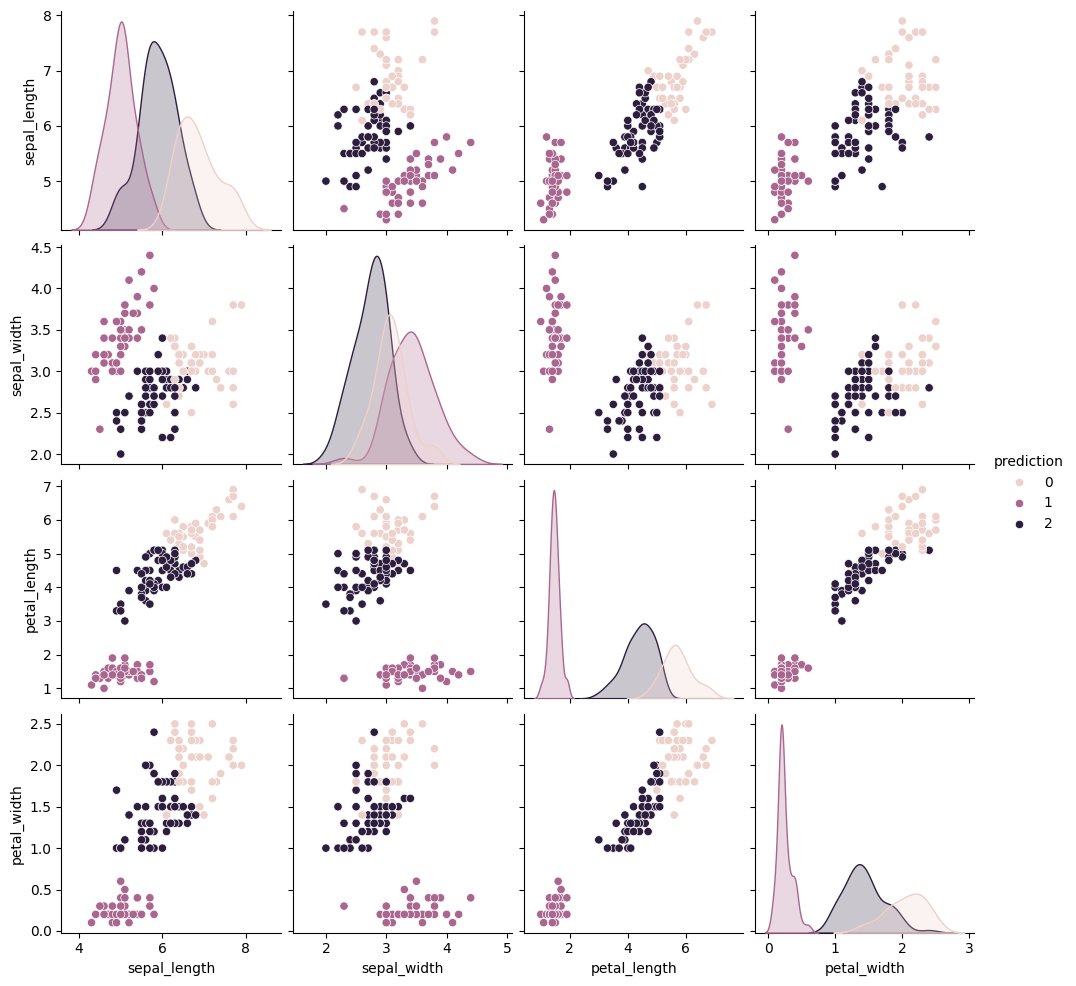

In [26]:
sns.pairplot(df, hue='prediction')

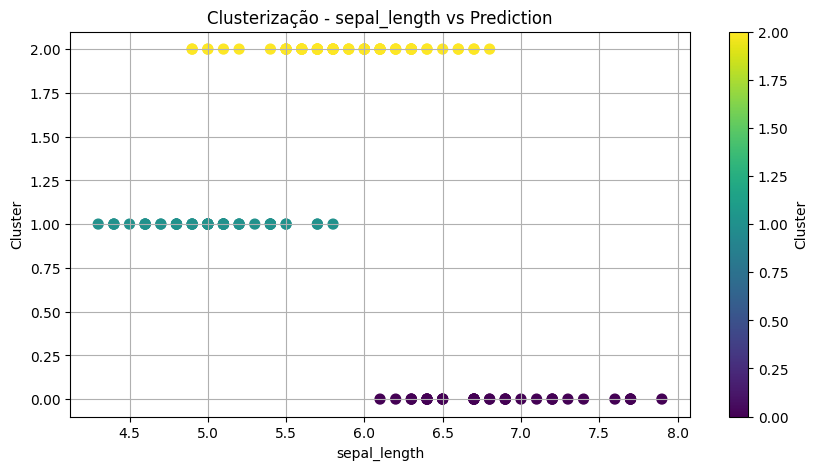

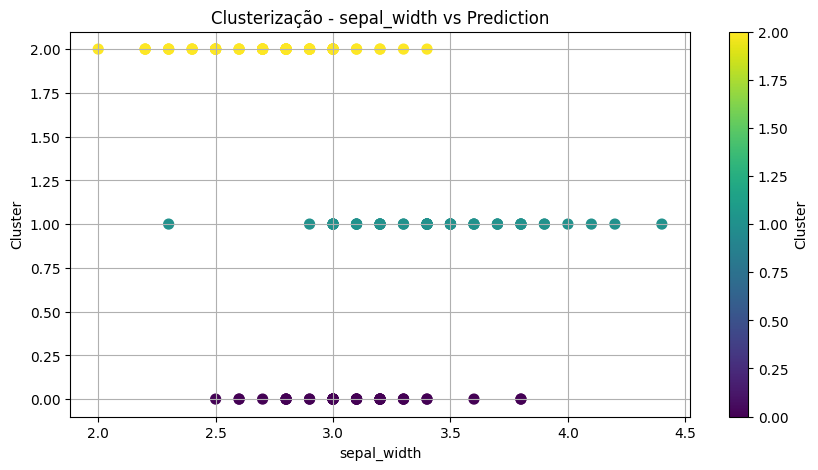

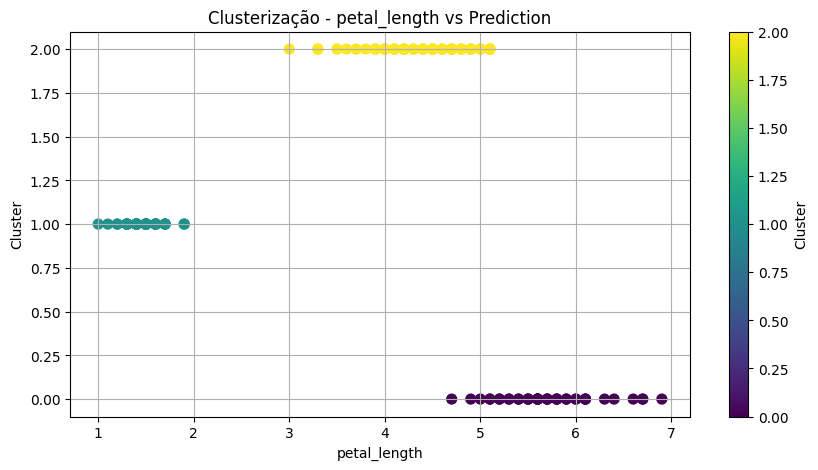

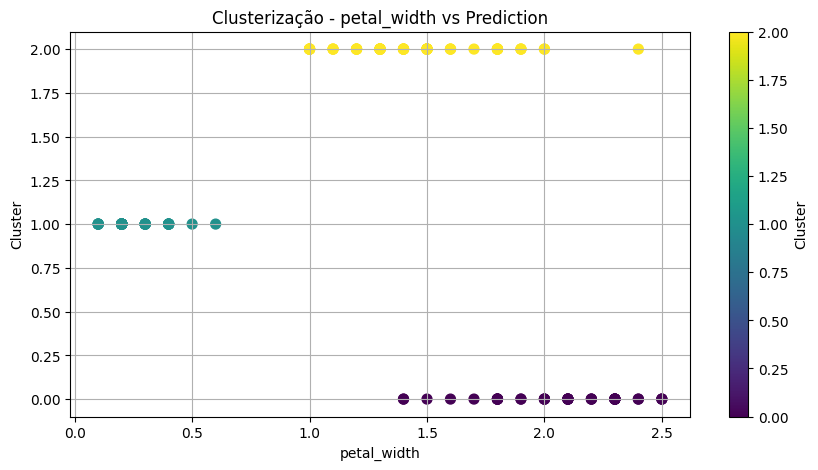

In [27]:
for column in xData.columns:
    plt.figure(figsize=(10, 5))
    plt.scatter(df[column], df.prediction, c=df.prediction, cmap='viridis', s=50)
    plt.title(f'Clusterização - {column} vs Prediction')
    plt.colorbar(label='Cluster')
    plt.xlabel(column), plt.ylabel('Cluster'), plt.grid()
    plt.show()